# Project 2: Ames Home Sale Price Prediction

---

# Part-1: Import Modules and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer, QuantileTransformer

from sklearn.metrics import mean_squared_error

---

In [2]:
df = pd.read_csv('./datasets/train.csv')

In [3]:
test_df = pd.read_csv('./datasets/test.csv')

In [4]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
df.shape

(2051, 81)

In [6]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [7]:
test_df.shape

(878, 80)

# Part-2: Data cleaning and EDA

In [8]:
df.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
                ... 
Electrical         0
Central Air        0
Heating QC         0
Sale Type          0
Id                 0
Length: 81, dtype: int64

---

### Columns with null values:

In [9]:
null_dict = dict(df.isnull().sum())

In [10]:
for k, v in null_dict.items():
    if v > 0:
        print(k + ': ', v)
    else:
        pass

Lot Frontage:  330
Alley:  1911
Mas Vnr Type:  22
Mas Vnr Area:  22
Bsmt Qual:  55
Bsmt Cond:  55
Bsmt Exposure:  58
BsmtFin Type 1:  55
BsmtFin SF 1:  1
BsmtFin Type 2:  56
BsmtFin SF 2:  1
Bsmt Unf SF:  1
Total Bsmt SF:  1
Bsmt Full Bath:  2
Bsmt Half Bath:  2
Fireplace Qu:  1000
Garage Type:  113
Garage Yr Blt:  114
Garage Finish:  114
Garage Cars:  1
Garage Area:  1
Garage Qual:  114
Garage Cond:  114
Pool QC:  2042
Fence:  1651
Misc Feature:  1986


---

### Datatypes:

In [11]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [12]:
df.dtypes.head()

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
dtype: object

In [13]:
dtypes_dict = df.dtypes.to_dict()

---

### Columns with strings:

In [14]:
for k, v in dtypes_dict.items():
    if v == "object":
        print(k + ': ', v)
    else:
        pass

MS Zoning:  object
Street:  object
Alley:  object
Lot Shape:  object
Land Contour:  object
Utilities:  object
Lot Config:  object
Land Slope:  object
Neighborhood:  object
Condition 1:  object
Condition 2:  object
Bldg Type:  object
House Style:  object
Roof Style:  object
Roof Matl:  object
Exterior 1st:  object
Exterior 2nd:  object
Mas Vnr Type:  object
Exter Qual:  object
Exter Cond:  object
Foundation:  object
Bsmt Qual:  object
Bsmt Cond:  object
Bsmt Exposure:  object
BsmtFin Type 1:  object
BsmtFin Type 2:  object
Heating:  object
Heating QC:  object
Central Air:  object
Electrical:  object
Kitchen Qual:  object
Functional:  object
Fireplace Qu:  object
Garage Type:  object
Garage Finish:  object
Garage Qual:  object
Garage Cond:  object
Paved Drive:  object
Pool QC:  object
Fence:  object
Misc Feature:  object
Sale Type:  object


---

### Numerical and non-categorical features:

In [15]:
numerical_cols = df._get_numeric_data()

In [16]:
test_numerical_cols = test_df._get_numeric_data()

In [17]:
numerical_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [18]:
numerical_features = [col for col in numerical_cols if col != 'SalePrice']

In [19]:
test_numerical_features = [col for col in test_numerical_cols if col != 'SalePrice']

In [20]:
df[numerical_features].head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,475.0,0,44,0,0,0,0,0,3,2010
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,559.0,0,74,0,0,0,0,0,4,2009
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,246.0,0,52,0,0,0,0,0,1,2010
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,400.0,100,0,0,0,0,0,0,4,2010
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,484.0,0,59,0,0,0,0,0,3,2010


---

## Correlation between the 'SalePrice' non-categorical columns:

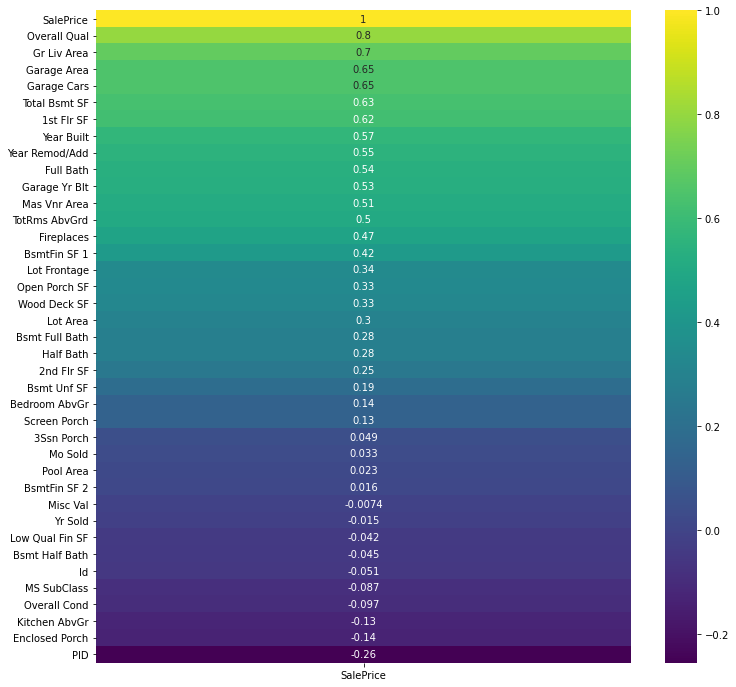

In [21]:
plt.figure(figsize=(12,12))

sns.heatmap(numerical_cols.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, cmap='viridis');

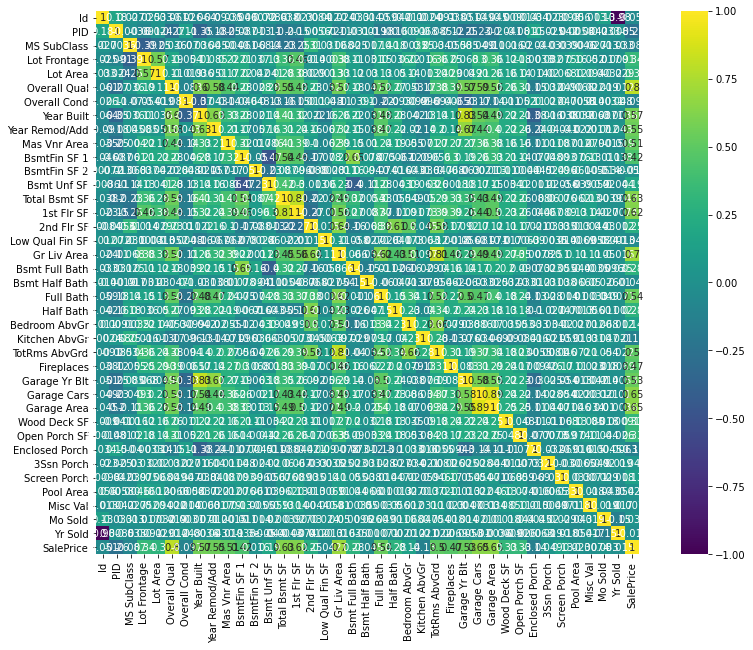

In [22]:
corr_data = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_data, cmap = 'viridis', vmin=-1, vmax = 1, annot= True, square=True);

In [23]:
df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).head(20)

,SalePrice
SalePrice,1.000000
Overall Qual,0.800207
Gr Liv Area,0.697038
Garage Area,0.650270
Garage Cars,0.648220
Total Bsmt SF,0.628925
1st Flr SF,0.618486
Year Built,0.571849
Year Remod/Add,0.550370
Full Bath,0.537969


<AxesSubplot:>

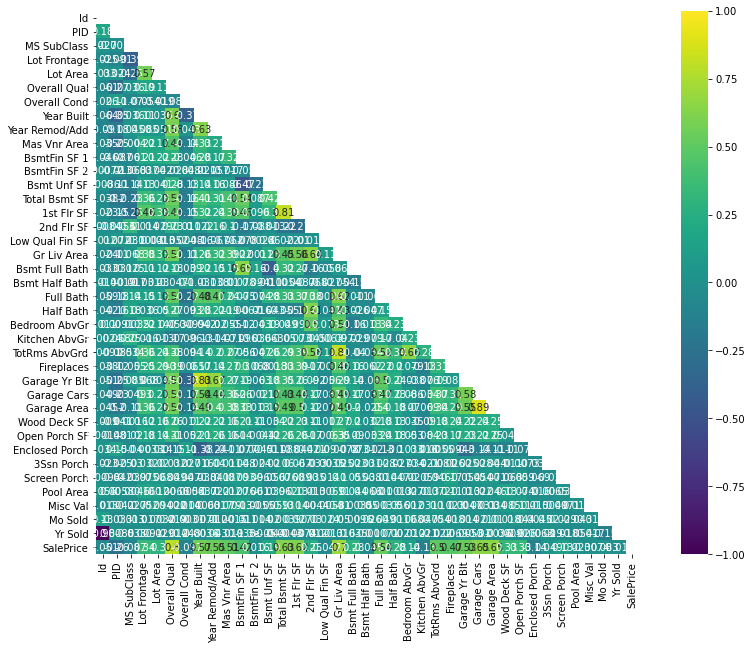

In [24]:
plt.figure(figsize=(15, 10))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1)

---

## Dictionary of non-categorical columns and their correlations:

In [25]:
corr_dict = numerical_cols.corr()[['SalePrice']].sort_values('SalePrice', ascending=False).to_dict()

In [26]:
corr_dict = corr_dict.pop('SalePrice', None)

---

## List of least correlated, non-categorical columns:

In [27]:
lowest_corr_list = sorted(corr_dict, key=lambda dict_key: abs(corr_dict[dict_key]))

In [28]:
lowest_corr_list[0:50]

['Misc Val',
 'Yr Sold',
 'BsmtFin SF 2',
 'Pool Area',
 'Mo Sold',
 'Low Qual Fin SF',
 'Bsmt Half Bath',
 '3Ssn Porch',
 'Id',
 'MS SubClass',
 'Overall Cond',
 'Kitchen AbvGr',
 'Screen Porch',
 'Enclosed Porch',
 'Bedroom AbvGr',
 'Bsmt Unf SF',
 '2nd Flr SF',
 'PID',
 'Half Bath',
 'Bsmt Full Bath',
 'Lot Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Lot Frontage',
 'BsmtFin SF 1',
 'Fireplaces',
 'TotRms AbvGrd',
 'Mas Vnr Area',
 'Garage Yr Blt',
 'Full Bath',
 'Year Remod/Add',
 'Year Built',
 '1st Flr SF',
 'Total Bsmt SF',
 'Garage Cars',
 'Garage Area',
 'Gr Liv Area',
 'Overall Qual',
 'SalePrice']

---

### Scatter Plots of Above Correlations in same order:

<ipython-input-29-ed002684f0d3>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


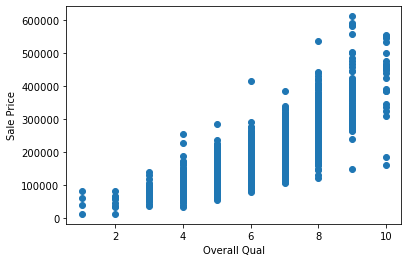

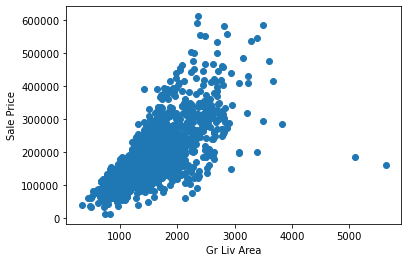

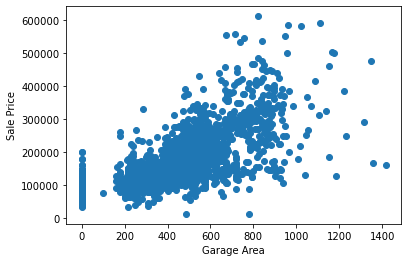

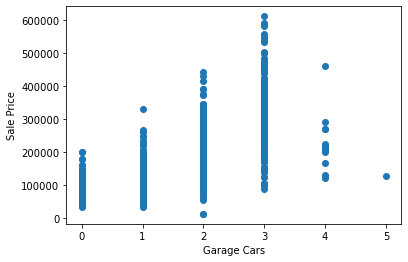

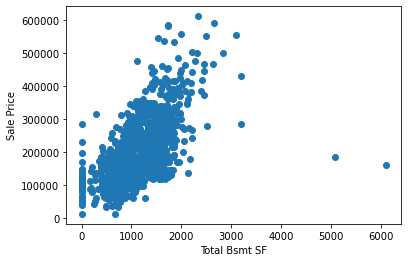

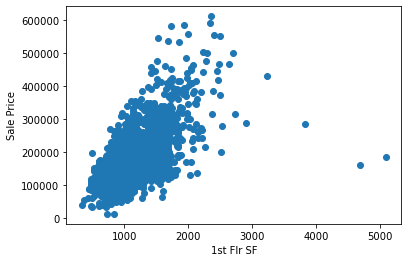

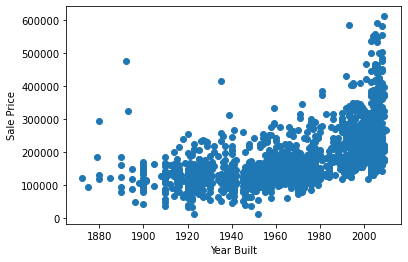

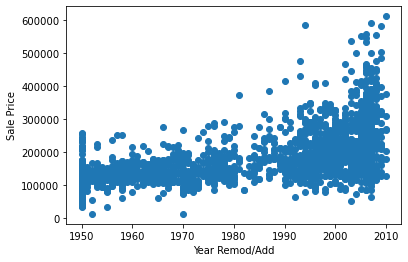

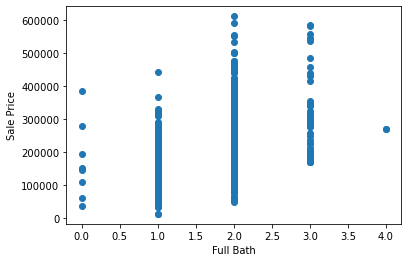

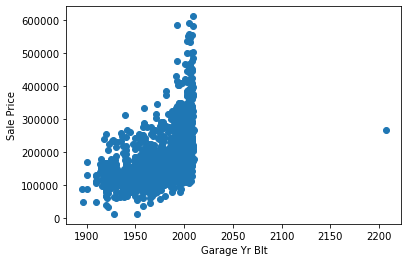

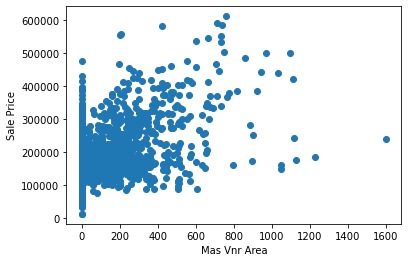

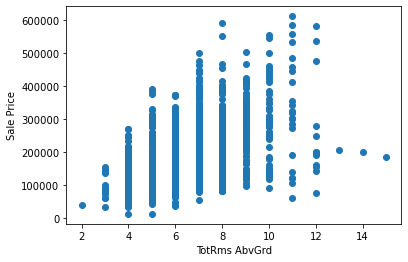

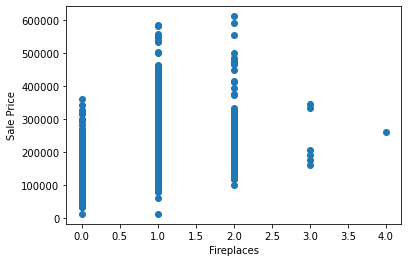

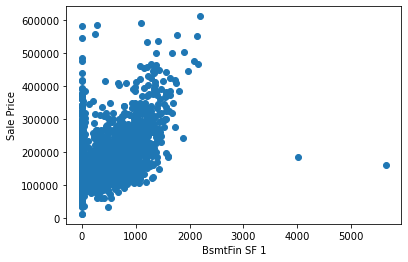

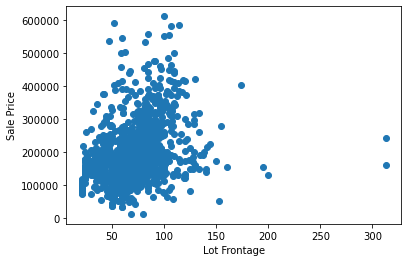

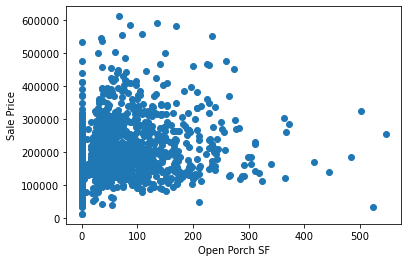

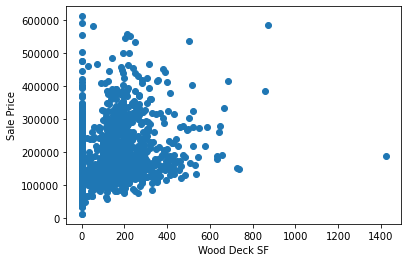

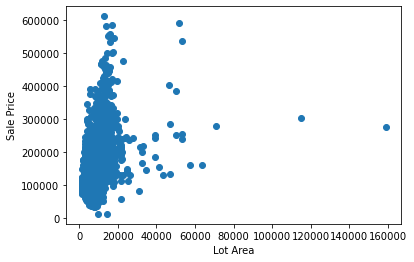

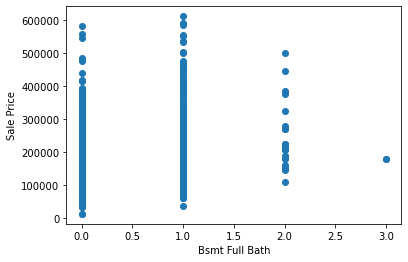

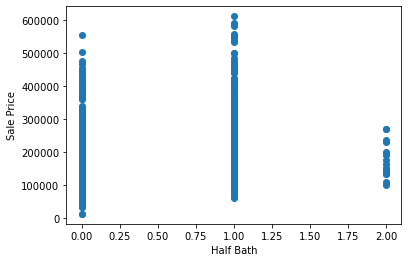

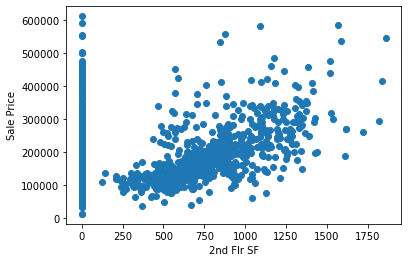

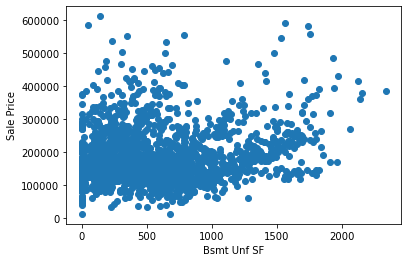

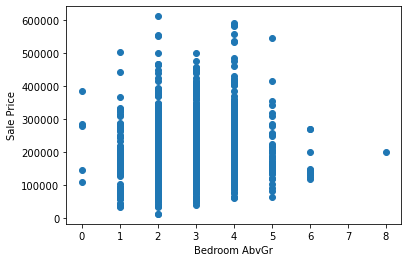

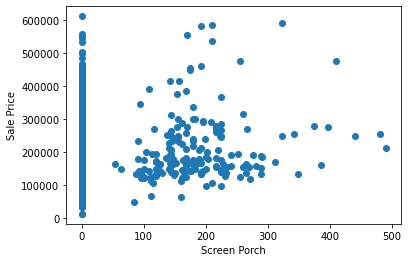

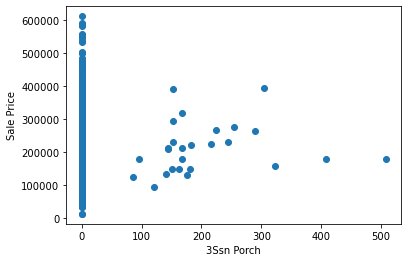

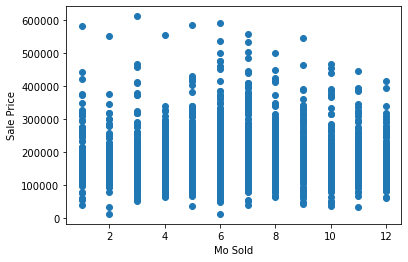

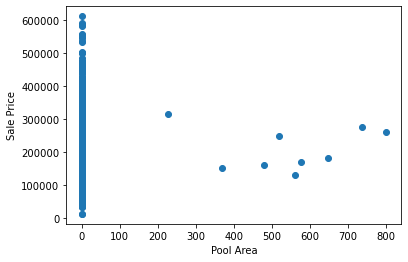

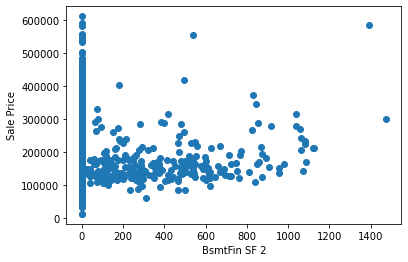

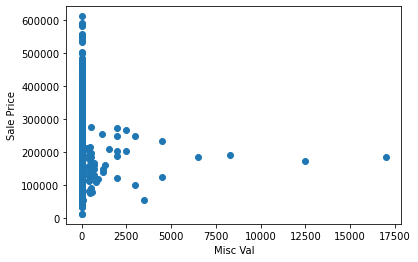

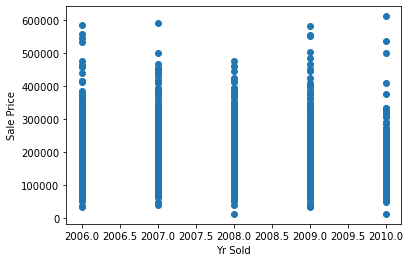

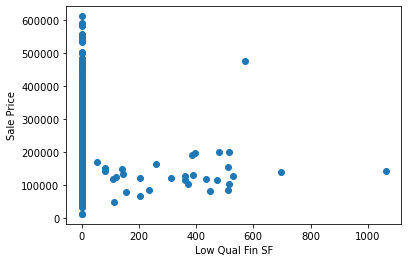

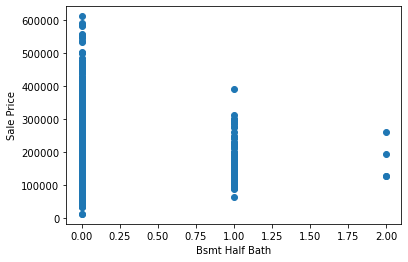

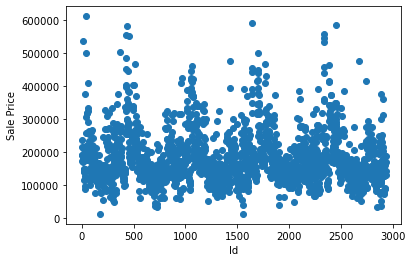

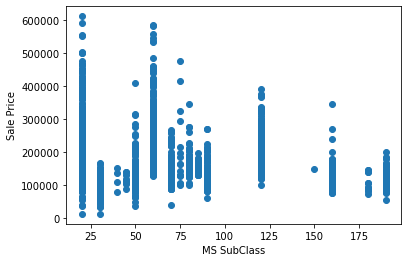

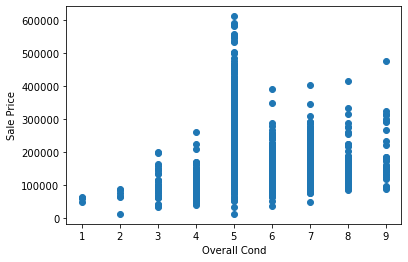

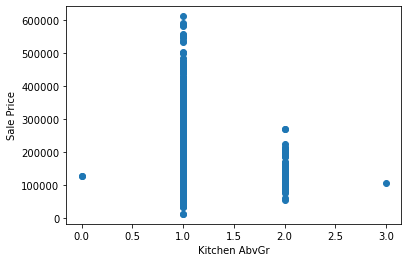

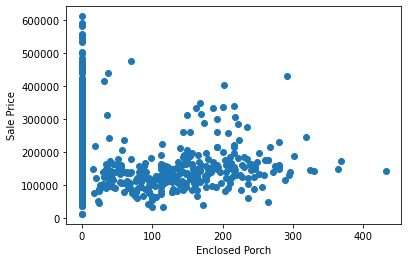

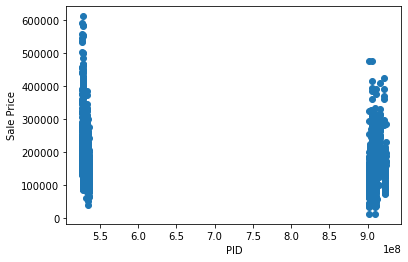

In [29]:
for col in list(numerical_cols.corr()[['SalePrice']].sort_values('SalePrice', ascending=False).index.values):
    
    if col != 'SalePrice':
        plt.figure()
        plt.ylabel('Sale Price')
        plt.xlabel(col)
        plt.scatter(numerical_cols[col], numerical_cols['SalePrice']);
    else:
        pass

## Handling Outlier in the 'Garage Yr Blt' column:

In [30]:
df[df['Garage Yr Blt'] > 2100]['Garage Yr Blt']

1699    2207.0
Name: Garage Yr Blt, dtype: float64

In [31]:
df['Year Built'][1699]

2006

** For Garage, built year was entered incorrectly. I think it should have been 2007 and not 2207.

In [32]:
df['Garage Yr Blt'][1699] = 2007

<ipython-input-32-1b42c2152d1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Garage Yr Blt'][1699] = 2007


In [33]:
df['Garage Yr Blt'][1699]

2007.0

### Testing above change in below scatter plot:

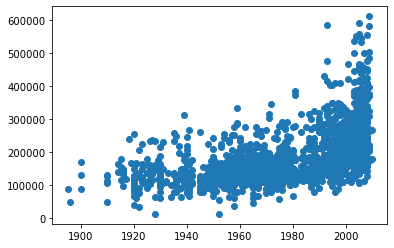

In [34]:
plt.scatter(numerical_cols['Garage Yr Blt'], numerical_cols['SalePrice']);

---

# Distribution of Home Sale Prices for listings in the 'Train' Data:

## Histogram

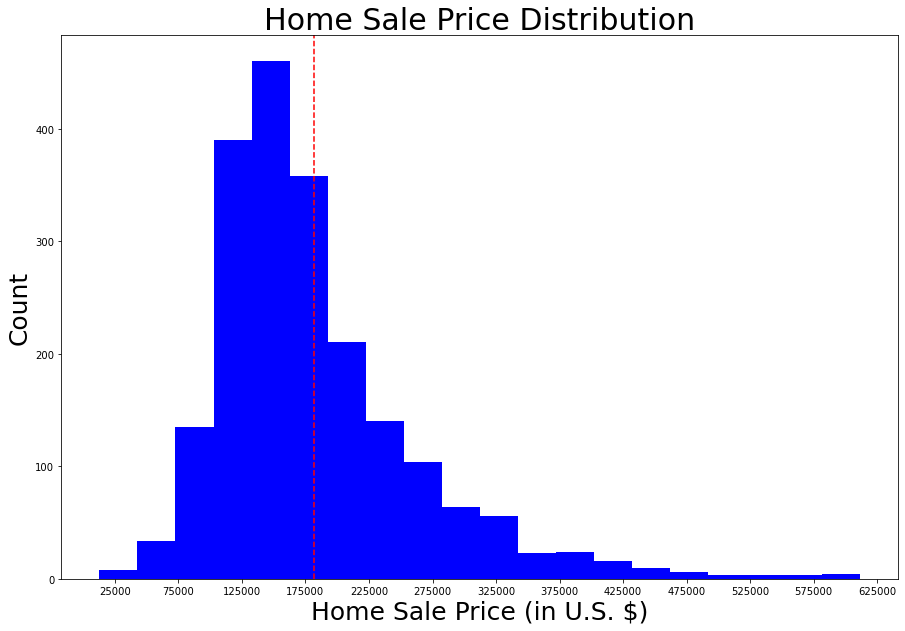

In [35]:
plt.figure(figsize=(15,10))

plt.title("Home Sale Price Distribution", fontsize=30)

plt.xlabel("Home Sale Price (in U.S. $)", fontsize=25)
plt.ylabel("Count", fontsize=25)

plt.xticks(range(25000, 625001, 50000))

plt.hist(df['SalePrice'], bins=20, color='blue')
plt.axvline(np.mean(df['SalePrice']), color='r', linestyle='dashed');

## Boxplot

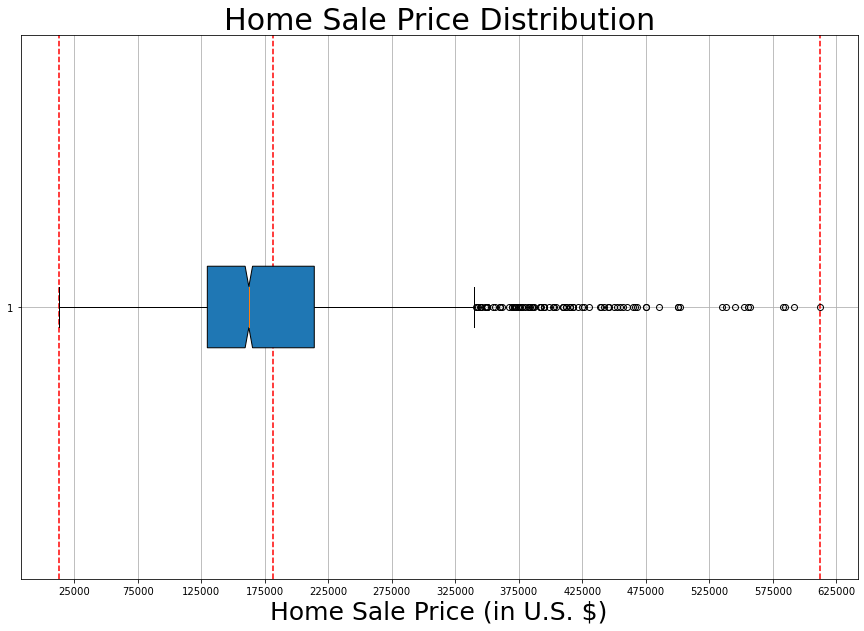

In [36]:
plt.figure(figsize=(15, 10))
plt.grid()

plt.title("Home Sale Price Distribution", fontsize=30)

plt.xlabel("Home Sale Price (in U.S. $)", fontsize=25)

plt.axvline(np.mean(df['SalePrice']), color='r', linestyle='dashed')
plt.axvline(np.max(df['SalePrice']), color='r', linestyle='dashed')
plt.axvline(np.min(df['SalePrice']), color='r', linestyle='dashed')

plt.xticks(range(25000, 625001, 50000))

plt.boxplot(df['SalePrice'], vert=False, patch_artist=True, notch=True);

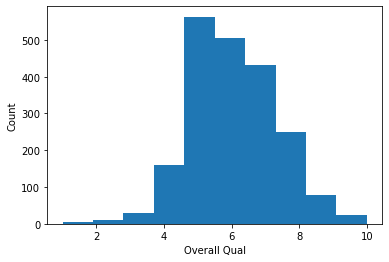

In [37]:
plt.ylabel('Count')
plt.xlabel('Overall Qual')
plt.hist(numerical_cols['Overall Qual']);

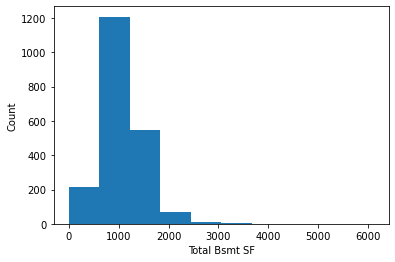

In [38]:
plt.ylabel('Count')
plt.xlabel('Total Bsmt SF')
plt.hist(numerical_cols['Total Bsmt SF']);


---

---

# Changing Categorical features into dummies

In [39]:
dummie_cols = pd.get_dummies(df)

In [40]:
test_dummie_cols = pd.get_dummies(test_df)

In [41]:
dummie_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
test_dummie_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,NaN,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,NaN,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


** I found discrepancy between the dummie columns in both the training df ('df') and the testing df ('test_df'). Let us deal with each df and make them same by filling zero values.

In [43]:
list_in_train_not_in_test = list(set(dummie_cols.columns) - set(test_dummie_cols.columns))

In [44]:
for col in list_in_train_not_in_test:
    test_dummie_cols[col] = 0

In [45]:
test_dummie_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Heating_OthW,Heating_Wall,Functional_Sev,MS Zoning_A (agr),Electrical_Mix,Exterior 1st_ImStucc,Neighborhood_GrnHill,Roof Matl_Membran,Bsmt Cond_Po,Heating QC_Po
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2718,905108090,90,NaN,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,0
4,625,535105100,20,NaN,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
list_in_test_not_in_train = list(set(test_dummie_cols.columns) - set(dummie_cols.columns))

In [47]:
for col in list_in_test_not_in_train:
    dummie_cols[col] = 0

In [48]:
dummie_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Exterior 1st_PreCast,Roof Matl_Metal,Exterior 2nd_PreCast,Heating_Floor,Roof Matl_Roll,Kitchen Qual_Po,Sale Type_VWD,Exterior 2nd_Other,Mas Vnr Type_CBlock
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,1,0,0,0,0,0,0,0,0,0
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,1,0,0,0,0,0,0,0,0,0
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,1,0,0,0,0,0,0,0,0,0
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,1,0,0,0,0,0,0,0,0,0
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,1,0,0,0,0,0,0,0,0,0


---

# Testing both df contain same dummie columns:

#### Train Data-Frame

In [49]:
list_of_dummie_cols = list(dummie_cols.columns)

In [50]:
list_of_df_cols = list(df.columns)

In [51]:
intersection = list(set(list_of_df_cols) & set(list_of_dummie_cols))

In [52]:
df.drop(intersection, axis=1, inplace=True)

#### Test Data-Frame

In [53]:
test_list_of_dummie_cols = list(test_dummie_cols.columns)

In [54]:
test_list_of_df_cols = list(test_df.columns)

In [55]:
test_intersection = list(set(test_list_of_df_cols) & set(test_list_of_dummie_cols))

In [56]:
test_df.drop(test_intersection, axis=1, inplace=True)

---

# Merge Dummie DF with original DF

#### Train Data-Frame

In [57]:
df = df.merge(dummie_cols, left_index=True, right_index=True)

In [58]:
df.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Sale Type_WD,Exterior 1st_PreCast,Roof Matl_Metal,Exterior 2nd_PreCast,Heating_Floor,Roof Matl_Roll,Kitchen Qual_Po,Sale Type_VWD,Exterior 2nd_Other,Mas Vnr Type_CBlock
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,1,0,0,0,0,0,0,0,0,0
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,1,0,0,0,0,0,0,0,0,0
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,1,0,0,0,0,0,0,0,0,0
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,1,0,0,0,0,0,0,0,0,0
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,1,0,0,0,0,0,0,0,0,0


#### Test Data-Frame

In [59]:
test_df = test_df.merge(test_dummie_cols, left_index=True, right_index=True)

In [60]:
test_df.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Heating_OthW,Heating_Wall,Functional_Sev,MS Zoning_A (agr),Electrical_Mix,Exterior 1st_ImStucc,Neighborhood_GrnHill,Roof Matl_Membran,Bsmt Cond_Po,Heating QC_Po
0,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,0,0,0,0,0,0,0,0,0,0
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,0,0,0,0,0,0,0,0,0,0
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,0,0,0,0,0,0,0,0,0,0
3,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,0,0,0,0,0,0,0,0,0,0
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,0,0,0,0,0,0,0,0,0,0


---

### Testing again dataframes' columns are arranged:

In [61]:
list(df.columns) == list(test_df.columns)

False

In [62]:
sorted(list(df.columns)) == sorted(list(test_df.columns))

True

### Arrange columns in 'test_df' to equal to train'df':

In [63]:
test_df = test_df[list(df.columns)]

In [64]:
list(df.columns) == list(test_df.columns)

True

---

## Categorical Columns: dropped

#### Train Data-Frame

In [65]:
cols_list = list(df.columns)

In [66]:
numerical_cols = df._get_numeric_data()

In [67]:
numerical_cols_list = list(numerical_cols.columns)

In [68]:
cat_cols_list = list(set(cols_list) - set(numerical_cols_list))

In [69]:
df_without_cat_cols = df.drop(cat_cols_list, axis=1)

In [70]:
df_without_cat_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Exterior 1st_PreCast,Roof Matl_Metal,Exterior 2nd_PreCast,Heating_Floor,Roof Matl_Roll,Kitchen Qual_Po,Sale Type_VWD,Exterior 2nd_Other,Mas Vnr Type_CBlock
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,1,0,0,0,0,0,0,0,0,0
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,1,0,0,0,0,0,0,0,0,0
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,1,0,0,0,0,0,0,0,0,0
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,1,0,0,0,0,0,0,0,0,0
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,1,0,0,0,0,0,0,0,0,0


#### Test Data-Frame

In [71]:
test_cols_list = list(test_df.columns)

In [72]:
test_numerical_cols = test_df._get_numeric_data()

In [73]:
test_numerical_cols_list = list(test_numerical_cols.columns)

In [74]:
test_cat_cols_list = list(set(test_cols_list) - set(test_numerical_cols_list))

In [75]:
test_df_without_cat_cols = test_df.drop(test_cat_cols_list, axis=1)

In [76]:
test_df_without_cat_cols.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Exterior 1st_PreCast,Roof Matl_Metal,Exterior 2nd_PreCast,Heating_Floor,Roof Matl_Roll,Kitchen Qual_Po,Sale Type_VWD,Exterior 2nd_Other,Mas Vnr Type_CBlock
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,1,0,0,0,0,0,0,0,0,0
1,2718,905108090,90,NaN,9662,5,4,1977,1977,0.0,...,1,0,0,0,0,0,0,0,0,0
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,1,0,0,0,0,0,0,0,0,0
4,625,535105100,20,NaN,9500,6,5,1963,1963,247.0,...,1,0,0,0,0,0,0,0,0,0


---

## Part-3: Summary Statistics Analysis

In [77]:
df_without_cat_cols.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Exterior 1st_PreCast,Roof Matl_Metal,Exterior 2nd_PreCast,Heating_Floor,Roof Matl_Roll,Kitchen Qual_Po,Sale Type_VWD,Exterior 2nd_Other,Mas Vnr Type_CBlock
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.0,2051.0,2051.0,2051.0,2051.0,2051.0,2051.0,2051.0,2051.0
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,0.868357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,0.338185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Let us run 'SalePrice':

In [78]:
saleprice_df = pd.DataFrame(df_without_cat_cols['SalePrice'].describe())

In [79]:
saleprice_df

,SalePrice
count,2051.000000
mean,181469.701609
std,79258.659352
min,12789.000000
25%,129825.000000
50%,162500.000000
75%,214000.000000
max,611657.000000


In [80]:
test_df_without_cat_cols.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_WD,Exterior 1st_PreCast,Roof Matl_Metal,Exterior 2nd_PreCast,Heating_Floor,Roof Matl_Roll,Kitchen Qual_Po,Sale Type_VWD,Exterior 2nd_Other,Mas Vnr Type_CBlock
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,...,0.859909,0.001139,0.001139,0.001139,0.001139,0.001139,0.001139,0.001139,0.001139,0.001139
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,...,0.347279,0.033748,0.033748,0.033748,0.033748,0.033748,0.033748,0.033748,0.033748,0.033748
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---

## Handling Null Values:

#### Train Data-Frame

In [81]:
df_without_cat_cols.isnull().sum().head()

Id                0
PID               0
MS SubClass       0
Lot Frontage    330
Lot Area          0
dtype: int64

In [82]:
df_without_cat_cols.replace(np.nan, 0, inplace=True)

In [83]:
df_without_cat_cols.isnull().sum().head()

Id              0
PID             0
MS SubClass     0
Lot Frontage    0
Lot Area        0
dtype: int64

#### Test Data-Frame

In [84]:
test_df_without_cat_cols.isnull().sum().head()

Id                0
PID               0
MS SubClass       0
Lot Frontage    160
Lot Area          0
dtype: int64

In [85]:
test_df_without_cat_cols.replace(np.nan, 0, inplace=True)

In [86]:
test_df_without_cat_cols.isnull().sum().head()

Id              0
PID             0
MS SubClass     0
Lot Frontage    0
Lot Area        0
dtype: int64

### Final test that columns are the same:

In [87]:
list(df_without_cat_cols.columns) == list(test_df_without_cat_cols)

True

---

# Part-4: Feature Engineering and model implementation

---

In [88]:
features = list(df_without_cat_cols.columns)

features.remove('SalePrice')

In [89]:
test_features = list(test_df_without_cat_cols.columns)

#I know I should not have to remove the 'SalePrice' column from the test set, but I am going to anyways, for the sake
# of being thorough and certain.

test_features.remove('SalePrice')

In [90]:
X = df_without_cat_cols[features]
y = df_without_cat_cols['SalePrice']

In [91]:
X_2 = test_df_without_cat_cols[test_features]
y_2 = test_df_without_cat_cols['SalePrice']

### Confirming that features are the same:

In [92]:
list(X) == list(X_2)

True

---

## Polynomial Features:

In [93]:
poly = PolynomialFeatures(include_bias=False, degree=2)
#poly = QuantileTransformer(n_quantiles=500, output_distribution='normal', random_state = 42)

In [94]:
X_poly = poly.fit_transform(X)

In [95]:
test_X_poly = poly.fit_transform(X_2)

---

### Train-Test Split the 'Train' df

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.01, random_state=42)

---

### Instantiate StandardScaler, fit, and transform

In [97]:
ss = StandardScaler()

In [98]:
ss.fit(X_train)

StandardScaler()

In [99]:
X_train_sc = ss.transform(X_train)
test_X_poly_sc = ss.transform(test_X_poly)


## Instantiate Regression Models

In [100]:
lr = LinearRegression()
ridge = Ridge()
ridgecv = RidgeCV()
lasso = Lasso()
lassocv = LassoCV()
en = ElasticNetCV()

---

## Creation of a function to convert them into csv for Kaggle submission:

In [101]:
def predics_to_csv(file_name_as_string, model, X):
    predictions = model.predict(X)
    predictions = pd.DataFrame(predictions)
    predictions.columns = ['SalePrice']
    predictions['Id'] = test_df_without_cat_cols['Id']
    predictions = predictions[['Id','SalePrice']]
    predictions.to_csv(file_name_as_string, index=False, sep=",")
    

---

## writing a function to see metrics:

In [102]:
def regression_metrics(X, y, model):
    import sklearn.metrics as metrics
    import sklearn.linear_model as linear_model
    import pandas as pd
    
    model = model.fit(X, y)
    y_hat = model.predict(X)

    r_squared = model.score(X, y)
    mean_squared_err = metrics.mean_squared_error(y, y_hat)
    root_mean_squared_err = np.sqrt(mean_squared_err)
    mean_abs_err = metrics.mean_absolute_error(y, y_hat)
    median_abs_err = metrics.median_absolute_error(y, y_hat)
    adj_r_squared = 1 - (1 - r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    
    
    print("R-squared: {}".format(r_squared))
    print("Adjusted R-squared: {}".format(adj_r_squared))
    print("Mean Squared Error: {}".format(mean_squared_err))
    print("Root Mean Squared Error: {}".format(root_mean_squared_err))
    print("Mean Absolute Error: {}".format(mean_abs_err))
    print("Median Absolute Error: {}".format(median_abs_err))

---

---

# Part-5: Different Model Building to achieve best score

---

## First try

## LinearRegression

In [103]:
lr.fit(X_train, y_train)

LinearRegression()

In [104]:
predics_to_csv('my_first_submission.csv', lr, test_X_poly_sc)

In [105]:
lr.score(X_test, y_test)

0.9124913880886272

In [106]:
regression_metrics(X_train, y_train, lr)

R-squared: 0.9833067331803216
Adjusted R-squared: 1.0007800520111727
Mean Squared Error: 104739704.60449132
Root Mean Squared Error: 10234.241769886587
Mean Absolute Error: 7390.185595618267
Median Absolute Error: 5781.115523300134


**Kaggle RMSE Score: **    66,28748

---

## Second try: RidgeCV

In [107]:
ridgecv.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [108]:
predics_to_csv('predics_2.csv', ridgecv, test_X_poly_sc)

In [109]:
regression_metrics(X_train_sc, y_train, ridgecv)

R-squared: 0.9999116938433426
Adjusted R-squared: 1.0000041264179051
Mean Squared Error: 554065.3523946304
Root Mean Squared Error: 744.3556625663772
Mean Absolute Error: 233.89306175422647
Median Absolute Error: 33.10659187643614


**Kaggle RMSE Score: **    27,396

---

### Third Try: ElasticNetCV

In [110]:
en.fit(X_train_sc, y_train)

ElasticNetCV()

In [111]:
predics_to_csv('predics_3.csv', en, test_X_poly_sc)

In [112]:
regression_metrics(X_train_sc, y_train, en)

R-squared: 0.9144062255706357
Adjusted R-squared: 1.0039996722396347
Mean Squared Error: 537046867.2523011
Root Mean Squared Error: 23174.271666058918
Mean Absolute Error: 15302.423153306716
Median Absolute Error: 10446.717282479862


**Kaggle RMSE Score: **    around 30k

---

## Fourth Try: Lasso with Alpha

In [113]:
lasso = Lasso(alpha=900)

In [114]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=900)

In [115]:
predics_to_csv('predics_4.csv', lasso, test_X_poly_sc)

In [116]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9632203321448314
Adjusted R-squared: 1.0017186602353272
Mean Squared Error: 230769183.06131023
Root Mean Squared Error: 15191.088935995018
Mean Absolute Error: 10881.010388591518
Median Absolute Error: 8010.519879298241


**Kaggle RMSE Score: **    24,945

---

### Result seems exciting and interesting due to variation in alpha. Therefore, let us tune alpha as much as I can.

---

## Fifth Try: Lasso with Alpha

In [117]:
lasso = Lasso(alpha=1000)

In [118]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1000)

In [119]:
predics_to_csv('predics_5.csv', lasso, test_X_poly_sc)

In [120]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9608661827745424
Adjusted R-squared: 1.0018286662018483
Mean Squared Error: 245539983.30684724
Root Mean Squared Error: 15669.715482638709
Mean Absolute Error: 11192.684204930722
Median Absolute Error: 8085.488117999354


**Kaggle RMSE Score: **    24741

---

In [121]:
lasso = Lasso(alpha=1200)

In [122]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1200)

In [123]:
predics_to_csv('predics_6.csv', lasso, test_X_poly_sc)

In [124]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9568225818593656
Adjusted R-squared: 1.0020176177749787
Mean Squared Error: 270911024.8153189
Root Mean Squared Error: 16459.37498252345
Mean Absolute Error: 11676.693215793091
Median Absolute Error: 8245.145994031845


**Kaggle RMSE Score: **    24681

---

In [125]:
lasso = Lasso(alpha=1100)

In [126]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1100)

In [127]:
predics_to_csv('predics_7.csv', lasso, test_X_poly_sc)

In [128]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9587275308521863
Adjusted R-squared: 1.001928602286933
Mean Squared Error: 258958673.19056374
Root Mean Squared Error: 16092.192926713367
Mean Absolute Error: 11455.365777488512
Median Absolute Error: 8132.1467166086295


**Kaggle RMSE Score: **    24695

---

### While changing alpha from 1200 to 1100 decreased my RMSE. this is a good hint for me  that alpha around 1100 is good to go. However, we can try other parameters.

---

In [129]:
lasso = Lasso(alpha=1100, max_iter=2500)

In [130]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1100, max_iter=2500)

In [131]:
predics_to_csv('predics_8.csv', lasso, test_X_poly_sc)

In [132]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9587275308521863
Adjusted R-squared: 1.001928602286933
Mean Squared Error: 258958673.19056374
Root Mean Squared Error: 16092.192926713367
Mean Absolute Error: 11455.365777488512
Median Absolute Error: 8132.1467166086295


**Kaggle RMSE Score: **    24695

---

### It seems chaning max_iter from 1000 to 2500 did not change RMSE.

---

In [133]:
lasso = Lasso(alpha=1120, max_iter=2500)

In [134]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1120, max_iter=2500)

In [135]:
predics_to_csv('predics_9.csv', lasso, test_X_poly_sc)

In [136]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9583387855090879
Adjusted R-squared: 1.0019467677898266
Mean Squared Error: 261397804.65849802
Root Mean Squared Error: 16167.801478818881
Mean Absolute Error: 11501.249519269879
Median Absolute Error: 8158.400659264604


**Kaggle RMSE Score: **    24691

---

In [137]:
lasso = Lasso(alpha=1050, max_iter=2500)

In [138]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1050, max_iter=2500)

In [139]:
predics_to_csv('predics_10.csv', lasso, test_X_poly_sc)

In [140]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9597807355784127
Adjusted R-squared: 1.0018793875661869
Mean Squared Error: 252350478.814675
Root Mean Squared Error: 15885.543075849657
Mean Absolute Error: 11326.98035645485
Median Absolute Error: 8090.809876759973


**Kaggle RMSE Score: **    24707

---

### I think its better to try droping some columns because result is not improving any further.

---

# Drop columns where lasso X coefficient = 0:

In [141]:
X_poly_df = pd.DataFrame(X_poly)

In [142]:
lasso_coefs = list(lasso.coef_)

In [143]:
lasso_col_titles = list(X_poly_df.columns)

In [144]:
lasso_col_coef_dict = dict(zip(lasso_col_titles, lasso_coefs))

In [145]:
absolute_lasso_dict = {}

for k, v in lasso_col_coef_dict.items():
    absolute_lasso_dict[k] = abs(v)

In [146]:
zerod_columns = []

for k in absolute_lasso_dict:
    if absolute_lasso_dict[k] == 0:
        zerod_columns.append(k)
    else:
        pass

In [147]:
test_X_poly_df = pd.DataFrame(test_X_poly)

In [148]:
X_poly_df.drop(zerod_columns, axis=1, inplace=True)

In [149]:
test_X_poly_df.drop(zerod_columns, axis=1, inplace=True)

In [150]:
False in (X_poly_df.columns == test_X_poly_df.columns)

False

In [151]:
y = df_without_cat_cols['SalePrice']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, random_state=42)

---

In [153]:
ss = StandardScaler()

In [154]:
ss.fit(X_train)

StandardScaler()

In [155]:
X_train_sc = ss.transform(X_train)

In [156]:
test_X_poly_df_sc = ss.transform(test_X_poly_df)

---

## Fitting Lasso on reduced columns and alpha manually set to 1050

In [157]:
lasso = Lasso(alpha=1050, max_iter=2500)

In [158]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1050, max_iter=2500)

In [159]:
predics_to_csv('predics_11.csv', lasso, test_X_poly_df_sc)

In [160]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9627169678378589
Adjusted R-squared: 0.9555782787339451
Mean Squared Error: 235797291.02375174
Root Mean Squared Error: 15355.692463179632
Mean Absolute Error: 11066.309311505962
Median Absolute Error: 8051.765862378132


**Kaggle RMSE Score: **    23024

## This can go to below if alpha is 1000 instead of 1050.

### Till now, This is an excellent approach to achieve lowest RMSE score on Kaggle. with score of 23024 with alpha 1050.

---

### Similar to above with decrease in alpha to 950

In [161]:
lasso = Lasso(alpha=950, max_iter=2500)

In [162]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=950, max_iter=2500)

In [163]:
predics_to_csv('predics_12.csv', lasso, test_X_poly_df_sc)

In [164]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9642502246937629
Adjusted R-squared: 0.9574051126777624
Mean Squared Error: 226100177.02579534
Root Mean Squared Error: 15036.627847552634
Mean Absolute Error: 10870.752261075531
Median Absolute Error: 8033.688776284631


### Now let me try with max_inter variation: no effect major

In [165]:
lasso = Lasso(alpha=970, max_iter=1000)

In [166]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=970)

In [167]:
predics_to_csv('predics_13.csv', lasso, test_X_poly_df_sc)

In [168]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9639453191877116
Adjusted R-squared: 0.9570418260399324
Mean Squared Error: 228028558.0660619
Root Mean Squared Error: 15100.614492995373
Mean Absolute Error: 10910.268773207405
Median Absolute Error: 8047.78728340978


---

### Similar to above with decrease in alpha to 980

In [169]:
lasso = Lasso(alpha=980, max_iter=1000)

In [170]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=980)

In [171]:
predics_to_csv('predics_14.csv', lasso, test_X_poly_df_sc)

In [172]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9637941670119442
Adjusted R-squared: 0.9568617323235336
Mean Squared Error: 228984523.0590193
Root Mean Squared Error: 15132.234569257089
Mean Absolute Error: 10929.765049381876
Median Absolute Error: 8025.7088259449665


In [173]:
regression_metrics(test_X_poly_sc, y_2, lasso)

R-squared: 1.0
Adjusted R-squared: 1.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0
Median Absolute Error: 0.0


/Users/tahir/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


In [232]:
lasso = Lasso(alpha=2500, max_iter=2500)

In [233]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=1200, max_iter=2500)

In [230]:
predics_to_csv('predics_25.csv', lasso, test_X_poly_df_sc)

In [231]:
regression_metrics(X_train_sc, y_train, lasso)

R-squared: 0.9410494837319566
Adjusted R-squared: 0.9297620592992383
Mean Squared Error: 372833732.5141517
Root Mean Squared Error: 19308.902933987516
Mean Absolute Error: 13334.415842219203
Median Absolute Error: 9317.883531887579


# Recommendations and Outlook:

---

Conclusion: Till now, 23024 scored is the lowest achieved RMSE score on Kaggle with alpha 1050. This can go to below if alpha is 1000 instead of 1050.

According to required score on Kaggle, this is my best achieved model with lowest RMSE score. This is acieved by dropping few columns zerod out by Lasso and setting the alpha to 1050. I do believe that with further resources and time, we may achieve further better model and score by tuning parameters.